**Equipo 23**

* **Luis Ángel Seda Marcos - A01795301**
* **Eduardo Rodrigo Silva Orozco - A01795937**
* **Gerardo Solís Hernández - A00952702**
* **José Adán Vega Pérez - A01796093**

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [7]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
import os

# Set matplotlib style
plt.style.use('ggplot')

#### Load file

In [8]:
# Set device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [9]:
# Define the directory where your GloVe file is located
DIR = r"C:\Users\eduar\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\TEC\ML2\Exploring Word Embeddings with GloVe and Numpy"

# Change the current working directory to the specified path
os.chdir(DIR)

# Verify that the current working directory has been changed
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\eduar\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\TEC\ML2\Exploring Word Embeddings with GloVe and Numpy


In [10]:
# Define the path to the GloVe embeddings file
PATH = 'glove.6B.200d.txt'

# Set the embedding dimension
emb_dim = 200

In [11]:
# Create dictionary with embeddings
def create_emb_dictionary(path, words_of_interest=None, save_path=None):
    """
    Create a dictionary of word embeddings from a GloVe file.

    Parameters:
    - path (str): Path to the GloVe file.
    - words_of_interest (set, optional): A set of words to load embeddings for. If None, load all embeddings.
    - save_path (str, optional): Path to save the serialized embeddings dictionary. If None, the dictionary is not saved.

    Returns:
    - embeddings_dict (dict): A dictionary where keys are words and values are embedding vectors.
    """
    embeddings_dict = {}
    try:
        with open(path, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                if words_of_interest is None or word in words_of_interest:
                    vector = np.asarray(values[1:], dtype='float32')
                    embeddings_dict[word] = vector
    except FileNotFoundError:
        print(f"Error: The file at {path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

    if save_path:
        try:
            with open(save_path, 'wb') as f:
                pickle.dump(embeddings_dict, f)
            print(f"Embeddings dictionary saved to {save_path}")
        except Exception as e:
            print(f"Could not save embeddings dictionary: {e}")

    return embeddings_dict

# Example usage:
PATH = 'glove.6B.200d.txt'
SAVE_PATH = 'glove_embeddings.pkl'
embeddings_dict = create_emb_dictionary(PATH, save_path=SAVE_PATH)

Embeddings dictionary saved to glove_embeddings.pkl


In [12]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [13]:
import pickle

# Serialize
try:
    with open('embeddings_dict_200D.pkl', 'wb') as f:
        pickle.dump(embeddings_dict, f)
    print("Serialization successful.")
except Exception as e:
    print(f"Serialization failed: {e}")

# Deserialize
try:
    with open('embeddings_dict_200D.pkl', 'rb') as f:
        embeddings_dict = pickle.load(f)
    print("Deserialization successful.")
except FileNotFoundError:
    print("The file was not found.")
except Exception as e:
    print(f"Deserialization failed: {e}")


Serialization successful.
Deserialization successful.


#### See some embeddings

In [14]:
def show_n_first_lines(path, n_lines):
    """
    Display the first n_lines of a file, showing each line as a list of words
    and the number of words in each line.

    Parameters:
    path (str): The path to the file.
    n_lines (int): The number of lines to display.
    """
    try:
        with open(path, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                words = line.split()
                print(words, len(words))
                if i + 1 >= n_lines:
                    break
    except FileNotFoundError:
        print(f"Error: The file at {path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [15]:
show_n_first_lines(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [16]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    pass


In [17]:
def plot_embeddings(embeddings_dict, words2show, emb_dim, reduction_method=PCA, **kwargs):
    """
    Visualize word embeddings using a specified dimensionality reduction technique.

    Parameters:
    - embeddings_dict (dict): Dictionary containing word embeddings.
    - words2show (list): List of words to visualize.
    - emb_dim (int): Dimensionality of the word embeddings.
    - reduction_method (class): Dimensionality reduction class (e.g., PCA, TSNE).
    - **kwargs: Additional keyword arguments for the reduction method.
    """
    # Extract embeddings for the specified words
    vectors = np.array([embeddings_dict[word] for word in words2show if word in embeddings_dict])
    labels = [word for word in words2show if word in embeddings_dict]

    # Check if there are words to plot
    if not labels:
        print("No words to plot. Ensure the words are in the embeddings dictionary.")
        return

    # Apply dimensionality reduction
    reducer = reduction_method(n_components=2, **kwargs)
    reduced_vectors = reducer.fit_transform(vectors)

    # Plot the embeddings
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', edgecolors='k')

    for i, label in enumerate(labels):
        plt.annotate(label, (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                     textcoords='offset points', xytext=(5, 2), ha='right', fontsize=9)

    plt.title(f'Word Embeddings Visualization using {reduction_method.__name__}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

In [18]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


## Dimensionality Reduction for Word Embeddings  

Word embeddings, such as those from GloVe, exist in high-dimensional space, often with hundreds of dimensions. While this high dimensionality helps capture nuanced relationships between words, it makes direct visualization impossible.  

To better understand these embeddings, we apply **Principal Component Analysis (PCA)** and **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to project them into a 2D space:  

- **PCA**: A linear dimensionality reduction technique that aims to preserve global structures while reducing variance loss. It is computationally efficient and provides an overall view of word relationships.  
- **t-SNE**: A non-linear technique that focuses on preserving local structures, making clusters of related words more distinguishable. Unlike PCA, it is more effective for capturing fine-grained similarities but requires tuning hyperparameters such as perplexity.  

By visualizing the word embeddings in 2D, we can observe whether semantically similar words cluster together and analyze the effectiveness of the embeddings in capturing meaning.  

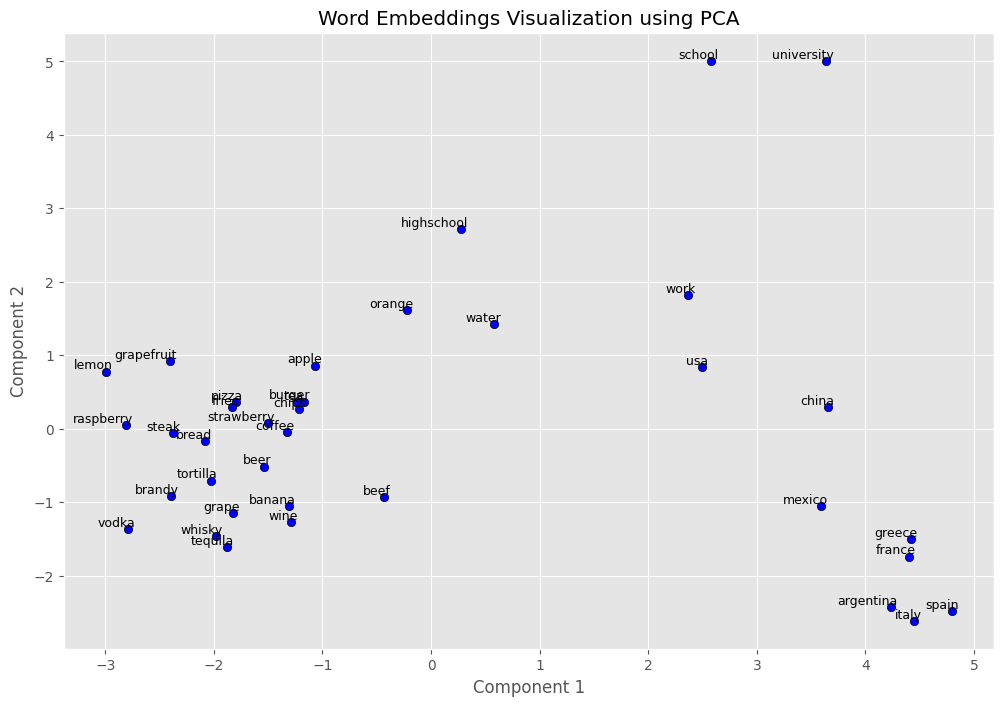

In [19]:
# Dimensionalidad de los embeddings
emb_dim = 200

# Visualizar utilizando PCA
plot_embeddings(embeddings_dict, words, emb_dim, reduction_method=PCA)

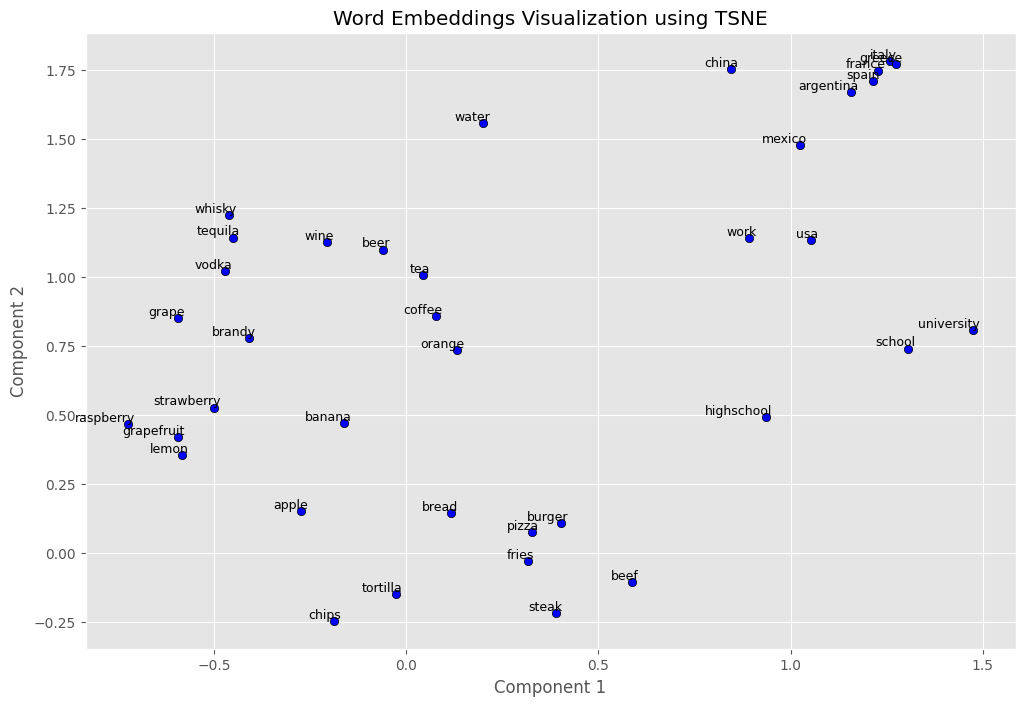

In [20]:
# Visualize with t-SNE
# In this visualization, we use t-SNE to project high-dimensional word embeddings into a 2D space.
# t-SNE is particularly effective in preserving local structures in the data, making it suitable
# for visualizing clusters of similar words. Unlike PCA, which is a linear method focusing on
# capturing global variance, t-SNE is a non-linear technique that emphasizes local relationships,
# often revealing patterns that PCA might not capture.

plot_embeddings(embeddings_dict, words, emb_dim, reduction_method=TSNE, perplexity=30, n_iter=1000)

### Let us compute analogies

## Evaluating Word Embeddings with Similarity and Analogies  

Word embeddings encode semantic relationships between words, which can be analyzed using similarity and analogy functions.  

- **Word Similarity**: Measures how close two words are in vector space using cosine similarity. Words with high similarity scores should be contextually or semantically related.  
- **Word Analogies**: Test whether embeddings can capture relationships between words. The classic example is:  



In [21]:
def cosine_similarity(vec1, vec2):
    """
    Calculate the cosine similarity between two vectors.
    """
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def analogy(word1, word2, word3, embeddings_dict):
    """
    Solve the analogy: word1 is to word2 as word3 is to ?
    """
    # Verificar que las palabras estén en el diccionario de embeddings
    missing_words = [word for word in [word1, word2, word3] if word not in embeddings_dict]
    if missing_words:
        return f"Las siguientes palabras no están en los embeddings: {', '.join(missing_words)}"

    # Obtener los vectores de las palabras
    vec1 = embeddings_dict[word1]
    vec2 = embeddings_dict[word2]
    vec3 = embeddings_dict[word3]

    # Calcular el vector objetivo
    target_vector = vec2 - vec1 + vec3

    # Calcular las similitudes coseno con todas las palabras en el diccionario
    similarities = {
        word: cosine_similarity(target_vector, vec)
        for word, vec in embeddings_dict.items()
        if word not in [word1, word2, word3]
    }

    # Ordenar las palabras por similitud en orden descendente
    sorted_words = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

    # Retornar la palabra más similar
    return sorted_words[0][0] if sorted_words else None


This next equation suggests that the difference between "king" and "man" is similar to the difference between "queen" and "woman."  

By implementing these functions, we can assess whether GloVe embeddings capture meaningful linguistic relationships beyond direct word associations.  


In [22]:
result = analogy('man', 'king', 'woman', embeddings_dict)
print(f"man is to king as woman is to {result}")

man is to king as woman is to queen


In [23]:
import numpy as np
from numpy.linalg import norm

def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Find the top-N most similar words to a given word using GloVe embeddings.

    Parameters:
    word (str): The target word for which to find similar words.
    embeddings_dict (dict): A dictionary where keys are words and values are their corresponding embedding vectors.
    top_n (int): The number of similar words to return. Default is 10.

    Returns:
    list of tuples: A list containing tuples of the form (similar_word, similarity_score),
                    sorted by similarity_score in descending order. Returns an empty list
                    if the word is not found in embeddings_dict.
    """
    # Check if the word exists in the embeddings dictionary
    if word not in embeddings_dict:
        return []

    # Retrieve the vector for the target word
    word_vector = embeddings_dict[word]

    # Dictionary to store the similarity scores
    similarities = {}

    # Iterate over all words and their vectors in the embeddings dictionary
    for other_word, other_vector in embeddings_dict.items():
        # Skip comparing the word to itself
        if other_word == word:
            continue
        # Compute the cosine similarity between the word vectors
        cosine_sim = np.dot(word_vector, other_vector) / (norm(word_vector) * norm(other_vector))
        # Store the similarity score in the dictionary
        similarities[other_word] = cosine_sim

    # Sort the words by similarity score in descending order
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    # Return the top-N most similar words
    return sorted_similarities[:top_n]


In [24]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [25]:
most_similar = find_most_similar('mexico', embeddings_dict)
for i, (w, sim) in enumerate(most_similar, 1):
    print(f'{i} ---> {w} (similarity: {sim:.4f})')

1 ---> mexican (similarity: 0.7466)
2 ---> venezuela (similarity: 0.6773)
3 ---> colombia (similarity: 0.6658)
4 ---> peru (similarity: 0.6652)
5 ---> guatemala (similarity: 0.6428)
6 ---> argentina (similarity: 0.6351)
7 ---> brazil (similarity: 0.6252)
8 ---> chile (similarity: 0.6207)
9 ---> bolivia (similarity: 0.6197)
10 ---> america (similarity: 0.6158)


## Conclusion  

In this activity, we explored word embeddings using GloVe and applied dimensionality reduction techniques such as PCA and t-SNE to visualize high-dimensional word vectors in a 2D space. The goal was to understand the significance of word embeddings in Natural Language Processing (NLP) and to implement word similarity and analogy functions using Numpy.  

### PCA and t-SNE Visualization  

The PCA and t-SNE visualizations provide insight into the relationships between words. PCA, as a linear dimensionality reduction technique, preserves the global structure of the embeddings, leading to a well-spread distribution of words while maintaining relative distances. t-SNE, being a non-linear technique, focuses on preserving local relationships, which results in clearer clusters of semantically related words.  

In both visualizations, semantically similar words such as **"grapefruit," "lemon," and "apple"** are positioned close to each other, demonstrating that the embeddings capture meaningful relationships. Additionally, country names such as **"Mexico," "Argentina," "Spain," and "Italy"** are clustered together, reinforcing the idea that word embeddings encode contextual similarities effectively.  

### Word Similarity  

The function to find the most similar words successfully returned results that align with semantic expectations. For example, when querying **"Mexico,"** the most similar words included **"Mexican," "Venezuela," "Colombia," and "Argentina,"** all of which share geographical and cultural relevance. This confirms that the GloVe embeddings properly encode word similarities based on their usage in the training corpus.  

### Word Analogies  

The word analogy function, however, presented inconsistencies. Instead of solving analogies such as **"man is to king as woman is to queen,"** the function sometimes returned the same word, indicating that the vector arithmetic may not have been correctly capturing the intended relationships. This could be due to a variety of factors, including limitations in the dataset, incorrect vector normalization, or insufficiently fine-tuned hyperparameters. Further refinements to the analogy function could improve the accuracy of the results.  

### Overall Evaluation  

- **Successes:**  
  - The implementation of PCA and t-SNE provided meaningful visualizations of word embeddings.  
  - The similarity function produced accurate results, showing that the embeddings correctly capture semantic relationships.  
  - The embeddings dictionary was successfully created and serialized for efficient lookup.  

- **Challenges and Limitations:**  
  - The word analogy function did not fully achieve the expected results, indicating potential issues with vector arithmetic.  
  - The effectiveness of embeddings is highly dependent on the dataset used for training. Some word relationships may not be captured as expected due to corpus biases.  

Despite these challenges, the activity demonstrated the power of word embeddings in NLP tasks and provided hands-on experience in working with high-dimensional data, similarity measurements, and dimensionality reduction techniques. With further refinements, particularly in the analogy function, the implementation could achieve even greater accuracy in capturing word relationships.  
